# CS 316 : Introduction to Deep Learning - Fall 2024
## Lab 05 : Loss Functions
### Dr. Abdul Samad

# Instructions

1. Make a copy of this notebook on google colab at start of the lab.

2. Please rename your notebook as *Lab_5_aa1234.ipynb* before starting the lab. Notebooks which do not follow appropriate naming convention will not be graded.

3. You have to submit this lab during the lab timings. You are allowed to submit till 11:59 PM on the day of your lab with a 30% penalty. No submissions will be accepted afterwards.

4. Use of AI is strictly prohibited. Anyone caught using Any AI tool during lab or while grading will be immediately reported to OCVS without any further discussion.

5. At the end of the lab, download the notebook (ipynb extension file) and upload it on canvas as a file. Submitting link to notebook or any other file will not be accepted.

6. Each task has points assigned to it. Total Lab is of 100 points.

7. Use of for loops is strictly prohibited.

8. For every theoretical question, there is a separate cell given at the end. You have to write your answer there.

9. If you have any questions, please feel free to reach out to the course instructor or RA.

## Task Overview


We will explore different loss functions in this lab. Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

# **Least Squares Loss**





Let's start with importing Libraries first

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt
# Import math Library
import math

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

# Define a shallow neural network
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Make sure that input data is (1 x n_data) array
    n_data = x.size
    x = np.reshape(x,(1,n_data))

    # This runs the network for ALL of the inputs, x at once so we can draw graph
    h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(omega_0,x))
    y = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(omega_1,h1)
    return y

In [3]:
# Get parameters for model -- we can call this function to easily reset them
def get_parameters():
  # And we'll create a network that approximately fits it
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((1,1));  # formerly phi_0
  omega_1 = np.zeros((1,3)); # formerly phi_x

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 0.1;
  omega_1[0,0] = -2.0; omega_1[0,1] = -1.0; omega_1[0,2] = 7.0

  return beta_0, omega_0, beta_1, omega_1

In [4]:
# Utility function for plotting data
def plot_univariate_regression(x_model, y_model, x_data = None, y_data = None, sigma_model = None, title= None):
  # Make sure model data are 1D arrays
  x_model = np.squeeze(x_model)
  y_model = np.squeeze(y_model)

  fig, ax = plt.subplots()
  ax.plot(x_model,y_model)
  if sigma_model is not None:
    ax.fill_between(x_model, y_model-2*sigma_model, y_model+2*sigma_model, color='lightgray')
  ax.set_xlabel(r'Input, $x$'); ax.set_ylabel(r'Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if title is not None:
    ax.set_title(title)
  if x_data is not None:
    ax.plot(x_data, y_data, 'ko')
  plt.show()

# Univariate regression

We'll investigate a simple univariate regression situation with a single input $x$ and a single output $y$ as pictured in figures 5.4 and 5.5b.

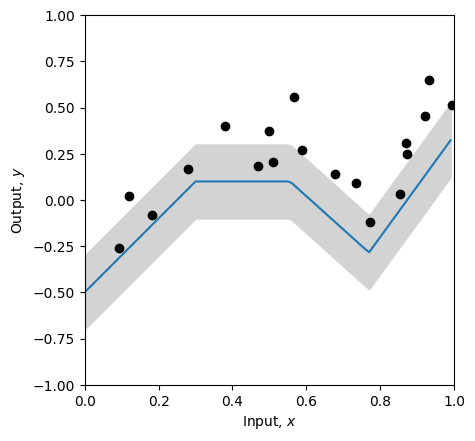

In [5]:
# Let's create some 1D training data
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.25934537,0.18195445,0.651270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.20716968,-0.08131792,0.51187806,0.16943738,0.3994327,\
                    0.019062570,0.55820410,0.452564960,-0.1183121,0.02957665,-1.24354444, \
                    0.248038840,0.26824970])

# Get parameters for the model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.1

# Define a range of input values
x_model = np.arange(0,1,0.01)
# Run the model to get values to plot and plot it.
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma)


# Q1: TODO [6 Points]
Look at the graph given above. Can you figure out what does this blue region represent? What would increasing and decreasing the length of this blue region mean? What do black dots represen and what does blue line represent?


Write you answer here

The blue line represents the values that our model predicts. The Blue (Grey - i think this was a mistake), represents the uncertainty in our predicted values. Increasing the grey area means that we have greater uncertainty in our predictions, while decreasing the length of the grey region would mean that we are more certain about our predictions. The black dots are the actual data points - that is, the actual values of the output y for corresponding inputs of x.

# Q2: TODO [3 Points]
Can you draw the image of this neural network given above? Submit the image alongside this notebook and rename this image as Q2_image. You can use any online tool to draw this as well.

<img alt='img' src='Q2_image.png' />

# Q3: TODO [10 points]
Code the equation for normal distribution by replacing the code given below. Use of numpy's function of normal distribution for solving thisis not allowed.

In [6]:
# Return probability using the equation in the above image given
def normal_distribution(y, mu, sigma):
  const = np.divide(1, math.sqrt(2*math.pi * sigma**2))
  expo = -np.divide((y - mu)**2, 2*sigma**2)
  return const * np.exp(expo)

In [7]:
#Do Not Edit
#Use this code for Testing
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.119,normal_distribution(1,-1,2.3)))
assert round(normal_distribution(1,-1,2.3),3)==0.119

Correct answer = 0.119, Your answer = 0.119


# Q4: TODO [6 Points]

Answer theoretical questions given below

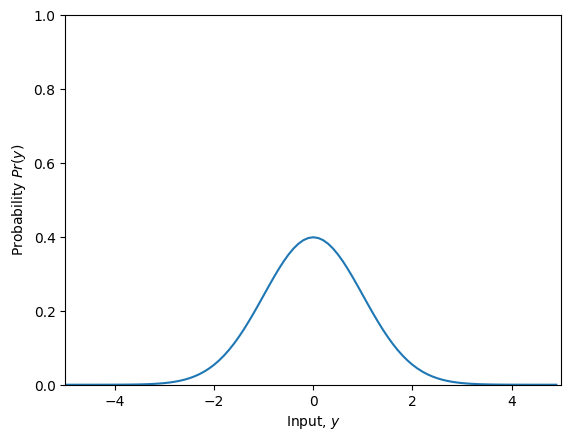

In [8]:
# Let's plot the Gaussian distribution.
y_gauss = np.arange(-5,5,0.1)
mu = 0; sigma = 1.0
gauss_prob = normal_distribution(y_gauss, mu, sigma)
fig, ax = plt.subplots()
ax.plot(y_gauss, gauss_prob)
ax.set_xlabel(r'Input, $y$'); ax.set_ylabel(r'Probability $Pr(y)$')
ax.set_xlim([-5,5]);ax.set_ylim([0,1.0])
plt.show()

# TODO
# 1. Predict what will happen if we change to mu=1 and leave sigma=1
# Write your answer here
# Changing the mean from 0 to 1 would shift the Guassian distribution to the right by 1 unit. The peak of the distribution would now be at 1, since the center of the distribution (mean) moves to 1. The width and shape will remain the same since the standard deviation is still unchanged.

# Now change the code above and see if you were correct.
# Write your answer here
# Obviously I was correct


# 2. Predict what will happen if we leave mu = 0 and change sigma to 2.0
# Write your answer here
# Since we are increasing the standard deviation, the Guassian distribution would become more wider, and flatter, since the distribution is going to be more spread out - there will be more variance in our distribution from points to the mean. The peak of the distribution will remain at 0, since the mean is unchanged, however, at a lower height. 


# 3. Predict what will happen if we leave mu = 0 and change sigma to 0.5
# Write your answer here
# Yup I was correct.

Now let's compute the likelihood using this function

# Q5: TODO [8 Points]

Compute the likelihood of the data -- the product of the normal probabilities for each data point. You will need np.prod() and the normal_distribution function you used above


In [9]:
# Use the equation given in image to answer this part.
def compute_likelihood(y_train, mu, sigma):
  likelihood = np.prod(normal_distribution(y_train, mu, sigma))
  return likelihood

In [10]:
#Do Not Edit
#Use this code for Testing

beta_0, omega_0, beta_1, omega_1 = get_parameters()
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
sigma = 0.2
likelihood = compute_likelihood(y_train, mu_pred, sigma)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000010624,likelihood))

assert round(likelihood,9)==0.000010624

Correct answer = 0.000010624, Your answer = 0.000010624


# Q6: TODO [7 Points]
What we have calculated earlier is likelihood. If we increase the number of values in training dataset then what will happen? Try using the empty codespace given below to test it and write the answer of this question after that cell.

In [11]:
# Use this space to test above given task 
x_train_30_more = np.concatenate([x_train, np.random.rand(30)])
y_train_30_more = np.concatenate([y_train, np.random.rand(30)])

beta_0_30_more, omega_0_30_more, beta_1_30_more, omega_1_30_more = get_parameters()
mu_pred_30_more = shallow_nn(x_train_30_more, beta_0_30_more, omega_0_30_more, beta_1_30_more, omega_1_30_more)
sigma = 0.2

likelihood = compute_likelihood(y_train_30_more, mu_pred_30_more, sigma)

print(f"likelihood for 30 more points: {likelihood}")

x_train_50_more = np.concatenate([x_train, np.random.rand(50)])
y_train_50_more = np.concatenate([y_train, np.random.rand(50)])

beta_0_50_more, omega_0_50_more, beta_1_50_more, omega_1_50_more = get_parameters()
mu_pred_50_more = shallow_nn(x_train_50_more, beta_0_50_more, omega_0_50_more, beta_1_50_more, omega_1_50_more)

likelihood = compute_likelihood(y_train_50_more, mu_pred_50_more, sigma)

print(f"likelihood for 50 more points: {likelihood}")

likelihood for 30 more points: 9.362361766214531e-57
likelihood for 50 more points: 1.776716953787793e-116


Write answer to the previous question here.

Increasing the number of data points is resulting in a smaller value for the likelihood, which may be because we are multiplying more probabilities together (which are between 0 and 1) and hence the product is getting smaller. This is because the likelihood is the probability of the data given the model, and as we increase the number of data points, the probability of the data given the model decreases.

# Q7: Task [8 Points]

You can see that this gives a very small answer, even for this small 1D dataset, and with the model fitting quite well.  This is because it is the product of several probabilities, which are all quite small themselves.
This will get out of hand pretty quickly with real datasets -- the likelihood will get so small that we can't represent it with normal finite-precision math.

This is why we use negative log likelihood.
Compute the negative log likelihood of the data without using a product. You will need np.sum(), np.log().

In [12]:
# Use the equation given in image to answer this part.
def compute_negative_log_likelihood(y_train, mu, sigma):
  probs = normal_distribution(y_train, mu, sigma)
  log_probs = np.log(probs)
  nll = -np.sum(log_probs)
  return nll

In [13]:
#Do Not Edit
#Use this code for Testing
beta_0, omega_0, beta_1, omega_1 = get_parameters()
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
sigma = 0.2
nll = compute_negative_log_likelihood(y_train, mu_pred, sigma)
print("Correct answer = %9.9f, Your answer = %9.9f"%(11.452419564,nll))

assert round(nll,9)==11.452419564

Correct answer = 11.452419564, Your answer = 11.452419564


You have already calculated sum of squares in Lab 3. We will use this as well. Code for this is given below.


In [14]:
def compute_sum_of_squares(y_train, y_pred):
  sum_of_squares = np.sum((y_train-y_pred)**2)
  return sum_of_squares

Now let's investigate finding the maximum likelihood / minimum negative log likelihood / least squares solution.  For simplicity, we'll assume that all the parameters are correct except one and look at how the likelihood, negative log likelihood, and sum of squares change as we manipulate the last parameter.  We'll start with overall y offset, beta_1 (formerly phi_0)

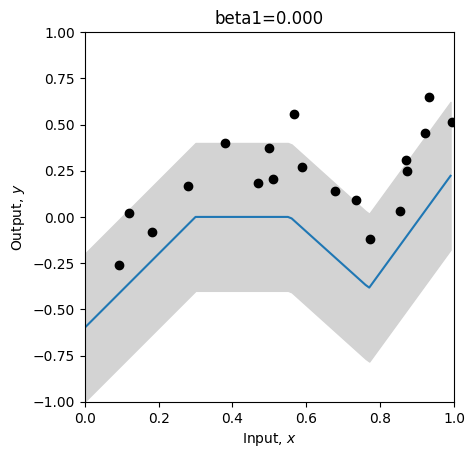

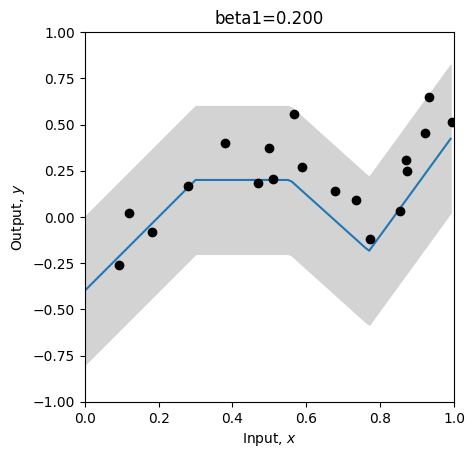

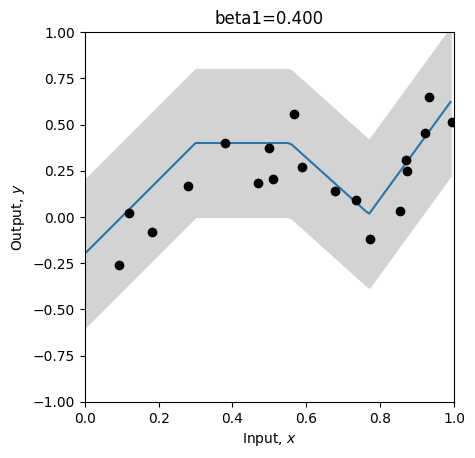

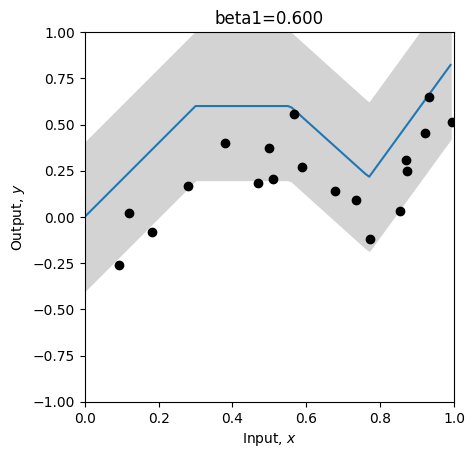

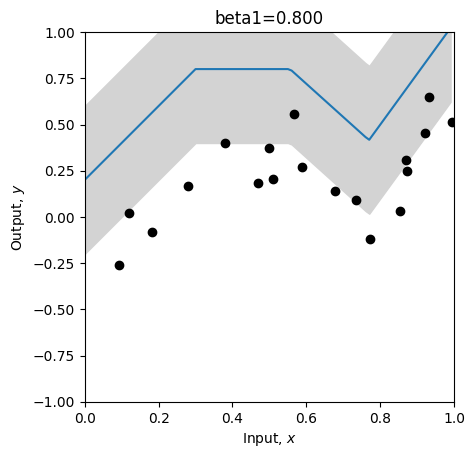

In [15]:
# Define a range of values for the parameter
beta_1_vals = np.arange(0,1.0,0.01)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)
sum_squares = np.zeros_like(beta_1_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1[0,0] = beta_1_vals[count]
  # Run the network with new parameters
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  # Compute and store the three values
  likelihoods[count] = compute_likelihood(y_train, mu_pred, sigma)
  nlls[count] = compute_negative_log_likelihood(y_train, mu_pred, sigma)
  sum_squares[count] = compute_sum_of_squares(y_train, y_pred)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))


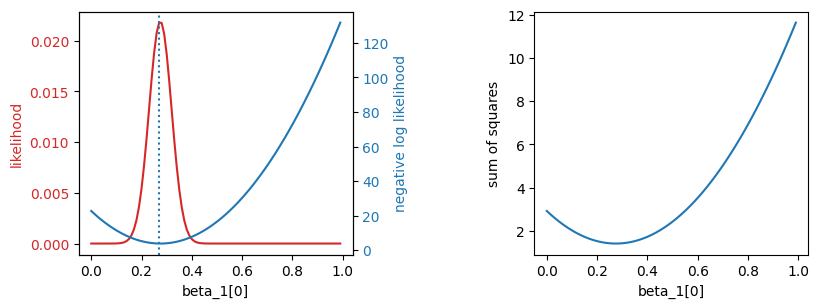

In [16]:
# Now let's plot the likelihood, negative log likelihood, and least squares as a function of the value of the offset beta1
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'

ax[0].set_xlabel('beta_1[0]')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(beta_1_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(beta_1_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(beta_1_vals, sum_squares); ax[1].set_xlabel('beta_1[0]'); ax[1].set_ylabel('sum of squares')
plt.show()

Maximum likelihood = 0.022, at beta_1=0.270
Minimum negative log likelihood = 3.826, at beta_1=0.270
Least squares = 1.411, at beta_1=0.270


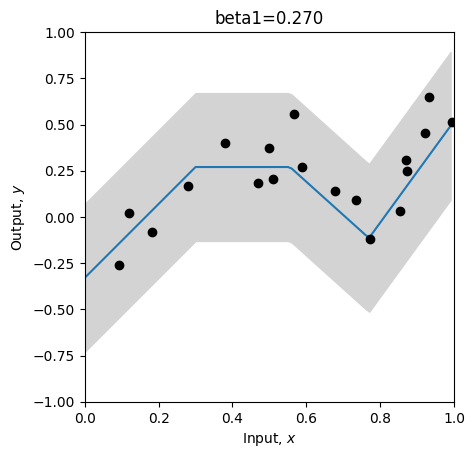

In [17]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# and the least squares solutions
# Let's check that:
print("Maximum likelihood = %3.3f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))
print("Least squares = %3.3f, at beta_1=%3.3f"%( (sum_squares[np.argmin(sum_squares)],beta_1_vals[np.argmin(sum_squares)])))

# Plot the best model
beta_1[0,0] = beta_1_vals[np.argmin(sum_squares)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))

# Q8: TODO [5 Points]
What did you learn about likelihood, negative log likelihood and sum of squares based on previous graphs? Write your asnwer in text space given below?

Write your answer here.


. As we increase the data points, our likelihood decreases a lot, since each probability is between 0 and 1, thus, quickly resulting in small values.

. The negative log likelihood is a better measure of the likelihood of the data given the model, since it is a sum of the log of the probabilities, which are between 0 and 1, and hence the sum is not as small as the product of the probabilities.

. The sum of squares is a measure of the error in our model, and as we increase the data points, the sum of squares increases, since we are summing the squares of the differences between the actual data points and the predicted data points.

We can infer the following from the graphs:
- The point where the likelihood function is maximized is the same as the point where the negative log likelihood is minimized, since the negative log likelihood is the negative of the log of the likelihood, and the log function is a monotonically increasing function.
- The least squares solution also coincides with the point where the likelihood function is maximized / negative log likelihood is minimized,
- The graphs show that all three metrics reach their optimized values at the same point, highlighting the relationship between these metrics in a regression problem. 
 

They all give the same answer. But you can see from the three plots above that the likelihood is very small unless the parameters are almost correct.  So in practice, we would work with the negative log likelihood or the least squares.<br>

Let's do the same thing with the standard deviation parameter of our network.  This is not an output of the network (unless we choose to make that the case), but it still affects the likelihood.



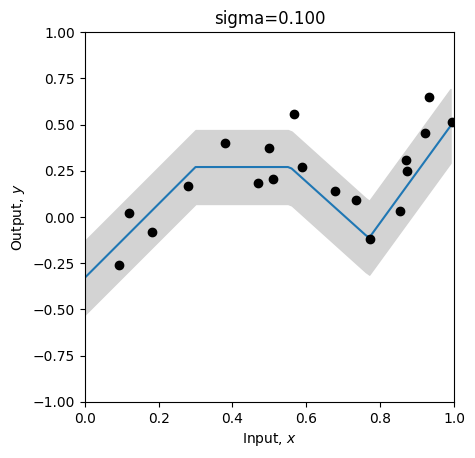

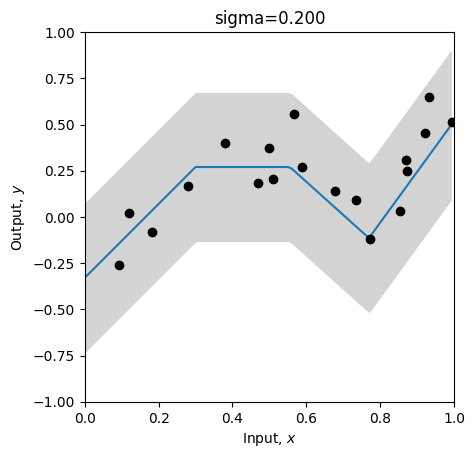

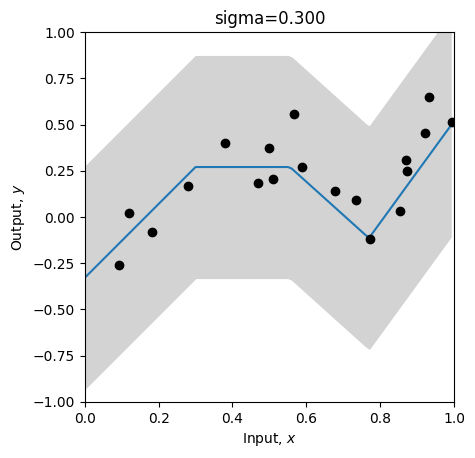

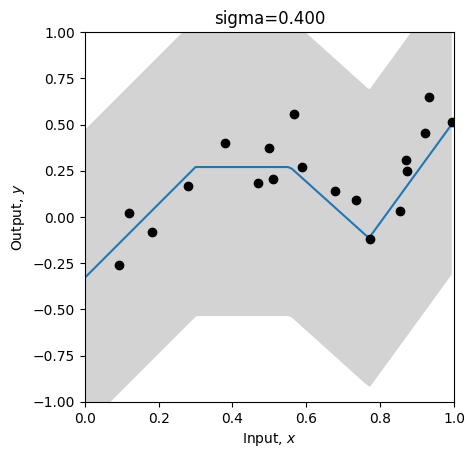

In [18]:
# Define a range of values for the parameter
sigma_vals = np.arange(0.1,0.5,0.005)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = np.zeros_like(sigma_vals)
nlls = np.zeros_like(sigma_vals)
sum_squares = np.zeros_like(sigma_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Might as well set to the best offset
beta_1[0,0] = 0.27
for count in range(len(sigma_vals)):
  # Set the value for the parameter
  sigma = sigma_vals[count]
  # Run the network with new parameters
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  # Compute and store the three values
  likelihoods[count] = compute_likelihood(y_train, mu_pred, sigma)
  nlls[count] = compute_negative_log_likelihood(y_train, mu_pred, sigma)
  sum_squares[count] = compute_sum_of_squares(y_train, y_pred)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model=sigma, title="sigma=%3.3f"%(sigma))

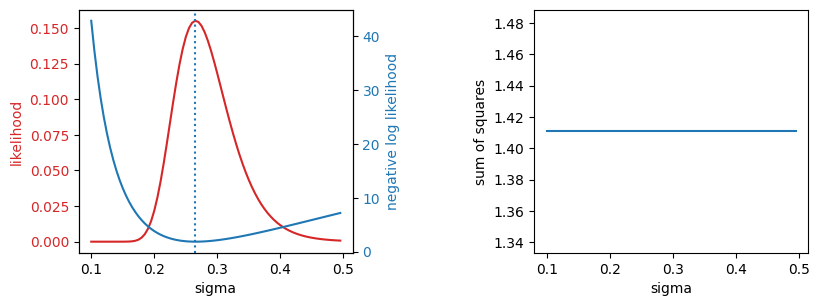

In [19]:
# Now let's plot the likelihood, negative log likelihood, and least squares as a function of the value of the standard deviation sigma
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax[0].set_xlabel('sigma')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(sigma_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(sigma_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = sigma_vals[np.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(sigma_vals, sum_squares); ax[1].set_xlabel('sigma'); ax[1].set_ylabel('sum of squares')
plt.show()

Maximum likelihood = 0.155, at sigma=0.265
Minimum negative log likelihood = 1.864, at sigma=0.265


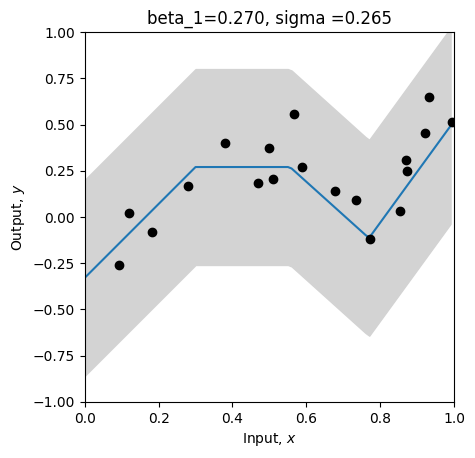

In [20]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# The least squares solution does not depend on sigma, so it's just flat -- no use here.
# Let's check that:
print("Maximum likelihood = %3.3f, at sigma=%3.3f"%( (likelihoods[np.argmax(likelihoods)],sigma_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at sigma=%3.3f"%( (nlls[np.argmin(nlls)],sigma_vals[np.argmin(nlls)])))
# Plot the best model
sigma= sigma_vals[np.argmin(nlls)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta_1=%3.3f, sigma =%3.3f"%(beta_1[0,0],sigma))

Obviously, to fit the full neural model we would vary all of the 10 parameters of the network in $\boldsymbol\beta_{0},\boldsymbol\Omega_{0},\boldsymbol\beta_{1},\boldsymbol\Omega_{1}$ (and maybe $\sigma$) until we find the combination that have the maximum likelihood / minimum negative log likelihood / least squares.<br><br>

Here we just varied one at a time as it is easier to see what is going on.  This is known as **coordinate descent**.


# Q9: TODO [5 Points]

Why is the graph of sum of squares flat? Write your answer in the text space given below.

Write your answer here.

The graph of the sum of squares is flat because does not depend on sigma, but only on the predicted values and the actual values of the data points. And the predicted values are calculated directly from the parameters of the model, which do not depend on sigma. Hence, the sum of squares does not change as we change sigma.

# **Binary Cross-Entropy Loss**
We will now look at the binary cross-entropy loss.  



In [21]:
# Utility function for plotting data
def plot_binary_classification(x_model, out_model, lambda_model, x_data = None, y_data = None, title= None):
  # Make sure model data are 1D arrays
  x_model = np.squeeze(x_model)
  out_model = np.squeeze(out_model)
  lambda_model = np.squeeze(lambda_model)

  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(7.0, 3.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_model,out_model)
  ax[0].set_xlabel(r'Input, $x$'); ax[0].set_ylabel(r'Model output')
  ax[0].set_xlim([0,1]);ax[0].set_ylim([-4,4])
  if title is not None:
    ax[0].set_title(title)
  ax[1].plot(x_model,lambda_model)
  ax[1].set_xlabel(r'Input, $x$'); ax[1].set_ylabel(r'$\lambda$ or Pr(y=1|x)')
  ax[1].set_xlim([0,1]);ax[1].set_ylim([-0.05,1.05])
  if title is not None:
    ax[1].set_title(title)
  if x_data is not None:
    ax[1].plot(x_data, y_data, 'ko')
  plt.show()

# Get parameters for model -- we can call this function to easily reset them
def get_parameters():
  # And we'll create a network that approximately fits it
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((1,1));  # formerly phi_0
  omega_1 = np.zeros((1,3)); # formerly phi_x

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 2.6;
  omega_1[0,0] = -24.0; omega_1[0,1] = -8.0; omega_1[0,2] = 50.0

  return beta_0, omega_0, beta_1, omega_1

# Q10: TODO [8 Points]
#Binary classification

In binary classification tasks, the network predicts the probability of the output belonging to class 1.  Since probabilities must lie in [0,1] and the network can output arbitrary values, we map the network through a sigmoid function that ensures the range is valid. Use of numpy's sigmoid function to solve this question is not allowed.

In [22]:
# Use the equation given in image to answer this part.
def sigmoid(model_out):
  sig_model_out = 1/(1+np.exp(-model_out))
  return sig_model_out

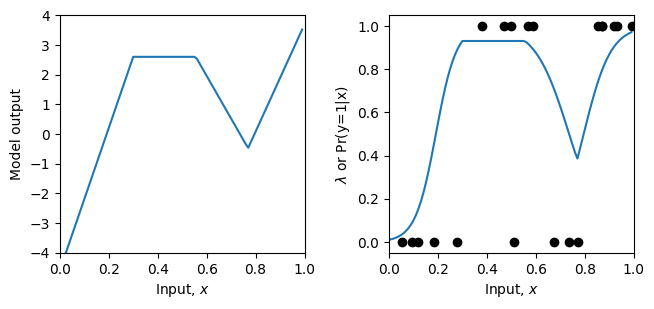

In [23]:
#Do Not Edit
#Use this code for Testing
#If your code for sigmoid is correct, this cell will generate graphs same as the ones given below

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([0,1,1,0,0,1,\
                    1,0,0,1,0,1,\
                    0,1,1,0,1,0, \
                    1,1])
beta_0, omega_0, beta_1, omega_1 = get_parameters()
x_model = np.arange(0,1,0.01)
model_out= shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = sigmoid(model_out)
plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train)

The left is model output and the right is the model output after the sigmoid has been applied, so it now lies in the range [0,1] and represents the probability, that y=1.  The black dots show the training data.  We'll compute the likelihood and the negative log likelihood.

# Task [6 Points]
# Bernouli Disribution

We looked at Normal Dsitribution earlier. We will now try using Bernouli Dstribution to perform the same task.


In [24]:
def bernoulli_distribution(y, lambda_param):
  prob = lambda_param**y * (1-lambda_param)**(1-y)
  return prob

In [25]:
#Do Not Edit
#Use this code for Testing
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.8,bernoulli_distribution(0,0.2)))
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.2,bernoulli_distribution(1,0.2)))
assert round(bernoulli_distribution(0,0.2),3)==0.8
assert round(bernoulli_distribution(1,0.2),3)==0.2

Correct answer = 0.800, Your answer = 0.800
Correct answer = 0.200, Your answer = 0.200


# Q11: Task [6 Points]
Compute the likelihood of the data -- the product of the Bernoulli probabilities for each data point.


In [26]:
# Use the equation given in image to answer this part.
def compute_likelihood(y_train, lambda_param):
  likelihood = np.prod(bernoulli_distribution(y_train, lambda_param))
  return likelihood

In [27]:
#Do Not Edit
#Use this code for Testing

beta_0, omega_0, beta_1, omega_1 = get_parameters()
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
lambda_train = sigmoid(model_out)
likelihood = compute_likelihood(y_train, lambda_train)
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000070237,likelihood))

assert round(likelihood,9)==0.000070237

Correct answer = 0.000070237, Your answer = 0.000070237


# Q12: Task [6 Points]

You can see that this gives a very small answer, even for this small 1D dataset, and with the model fitting quite well.  This is because it is the product of several probabilities, which are all quite small themselves.
This will get out of hand pretty quickly with real datasets -- the likelihood will get so small that we can't represent it with normal finite-precision math

This is why we use negative log likelihood.

Compute the likelihood of the data -- don't use the likelihood function above -- compute the negative sum of the log probabilities.

In [28]:
# Use the equation given in image to answer this part.
def compute_negative_log_likelihood(y_train, lambda_param):
  probs = bernoulli_distribution(y_train, lambda_param)
  log_probs = np.log(probs)
  nll = -np.sum(log_probs)
  return nll

In [29]:
#Do Not Edit
#Use this code for Testing

beta_0, omega_0, beta_1, omega_1 = get_parameters()
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
lambda_train = sigmoid(model_out)
nll = compute_negative_log_likelihood(y_train, lambda_train)
print("Correct answer = %9.9f, Your answer = %9.9f"%(9.563639387,nll))

assert round(nll,9)==9.563639387

Correct answer = 9.563639387, Your answer = 9.563639387


Now let's investigate finding the maximum likelihood / minimum negative log likelihood solution.  For simplicity, we'll assume that all the parameters are fixed except one and look at how the likelihood and negative log likelihood change as we manipulate the last parameter.  We'll start with overall y_offset, beta_1 (formerly phi_0)

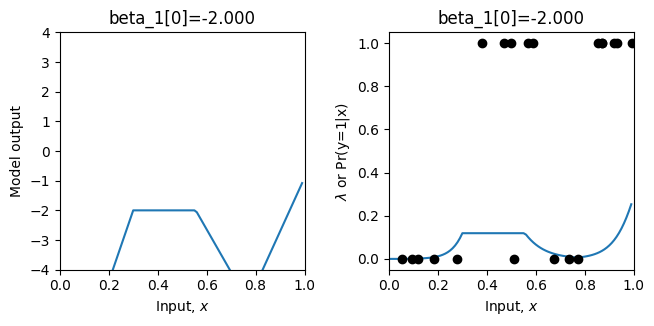

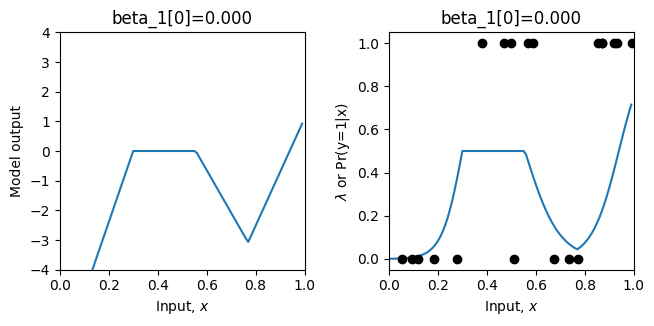

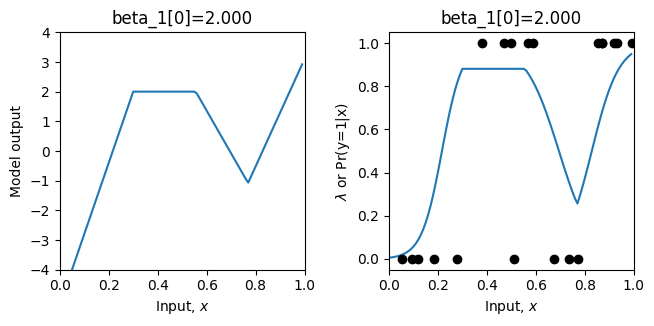

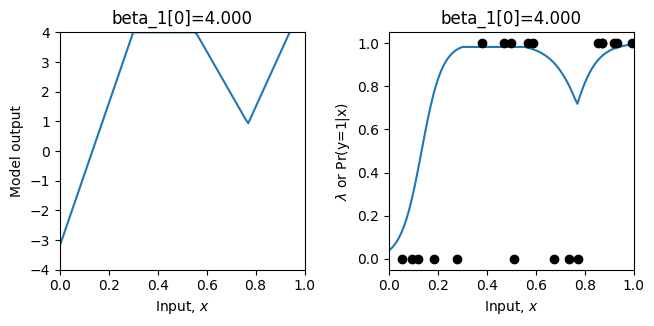

In [30]:
# Define a range of values for the parameter
beta_1_vals = np.arange(-2,6.0,0.1)
# Create some arrays to store the likelihoods, negative log likelihoods
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1[0,0] = beta_1_vals[count]
  # Run the network with new parameters
  model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  lambda_train = sigmoid(model_out)
  # Compute and store the two values
  likelihoods[count] = compute_likelihood(y_train,lambda_train)
  nlls[count] = compute_negative_log_likelihood(y_train, lambda_train)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    lambda_model = sigmoid(model_out)
    plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta_1[0]=%3.3f"%(beta_1[0,0]))


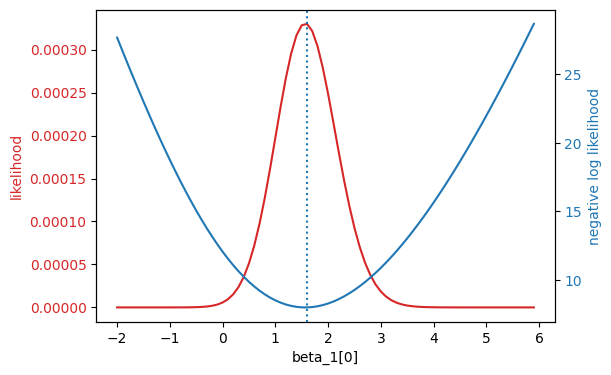

In [31]:
# Now let's plot the likelihood and negative log likelihood as a function of the value of the offset beta1
fig, ax = plt.subplots()
fig.tight_layout(pad=5.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax.set_xlabel('beta_1[0]')
ax.set_ylabel('likelihood', color = likelihood_color)
ax.plot(beta_1_vals, likelihoods, color = likelihood_color)
ax.tick_params(axis='y', labelcolor=likelihood_color)

ax1 = ax.twinx()
ax1.plot(beta_1_vals, nlls, color = nll_color)
ax1.set_ylabel('negative log likelihood', color = nll_color)
ax1.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')

plt.show()

Maximum likelihood = 0.000330, at beta_1=1.600
Minimum negative log likelihood = 8.016513, at beta_1=1.600


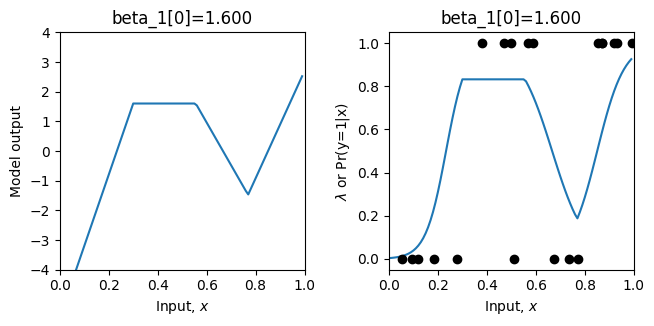

In [32]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# Let's check that:
print("Maximum likelihood = %f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))

# Plot the best model
beta_1[0,0] = beta_1_vals[np.argmin(nlls)]
model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = sigmoid(model_out)
plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta_1[0]=%3.3f"%(beta_1[0,0]))


They both give the same answer. But you can see from the likelihood above that the likelihood is very small unless the parameters are almost correct.  So in practice, we would work with the negative log likelihood.<br><br>

Again, to fit the full neural model we would vary all of the 10 parameters of the network in the $\boldsymbol\beta_{0},\boldsymbol\Omega_{0},\boldsymbol\beta_{1},\boldsymbol\Omega_{1}$ until we find the combination that have the maximum likelihood / minimum negative log likelihood.<br><br>



# MultiClass Cross Entropy Loss

In [33]:
# Get parameters for model -- we can call this function to easily reset them
def get_parameters():
  # And we'll create a network that approximately fits it
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((3,1));  # NOTE -- there are three outputs now (one for each class, so three output biases)
  omega_1 = np.zeros((3,3)); # NOTE -- there are three outputs now (one for each class, so nine output weights, connecting 3 hidden units to 3 outputs)

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 2.0; beta_1[1,0] = -2; beta_1[2,0] = 0.0
  omega_1[0,0] = -24.0; omega_1[0,1] = -8.0; omega_1[0,2] = 50.0
  omega_1[1,0] = -2.0; omega_1[1,1] = 8.0; omega_1[1,2] = -30.0
  omega_1[2,0] = 16.0; omega_1[2,1] = -8.0; omega_1[2,2] =-8

  return beta_0, omega_0, beta_1, omega_1

In [34]:
# Utility function for plotting data
def plot_multiclass_classification(x_model, out_model, lambda_model, x_data = None, y_data = None, title= None):
  # Make sure model data are 1D arrays
  n_data = len(x_model)
  n_class = 3
  x_model = np.squeeze(x_model)
  out_model = np.reshape(out_model, (n_class,n_data))
  lambda_model = np.reshape(lambda_model, (n_class,n_data))

  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(7.0, 3.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_model,out_model[0,:],'r-')
  ax[0].plot(x_model,out_model[1,:],'g-')
  ax[0].plot(x_model,out_model[2,:],'b-')
  ax[0].set_xlabel('Input, $x$'); ax[0].set_ylabel('Model outputs')
  ax[0].set_xlim([0,1]);ax[0].set_ylim([-4,4])
  if title is not None:
    ax[0].set_title(title)
  ax[1].plot(x_model,lambda_model[0,:],'r-')
  ax[1].plot(x_model,lambda_model[1,:],'g-')
  ax[1].plot(x_model,lambda_model[2,:],'b-')
  ax[1].set_xlabel('Input, $x$'); ax[1].set_ylabel('$\lambda$ or Pr(y=k|x)')
  ax[1].set_xlim([0,1]);ax[1].set_ylim([-0.1,1.05])
  if title is not None:
    ax[1].set_title(title)
  if x_data is not None:
    for i in range(len(x_data)):
      if y_data[i] ==0:
        ax[1].plot(x_data[i],-0.05, 'r.')
      if y_data[i] ==1:
        ax[1].plot(x_data[i],-0.05, 'g.')
      if y_data[i] ==2:
        ax[1].plot(x_data[i],-0.05, 'b.')
  plt.show()

# Multiclass classification

For multiclass classification, the network must predict the probability of $K$ classes, using $K$ outputs.  However, these probability must be non-negative and sum to one, and the network outputs can take arbitrary values.  Hence, we pass the outputs through a softmax function which maps $K$ arbitrary values to $K$ non-negative values that sum to one.

# Task [10 Points]

Write Softmax function that maps a vector of arbitrary values to a vector of values that are positive and sum to one.

In [35]:
# Code the equation given in image above
def softmax(model_out):
  num = np.exp(model_out)
  denom = np.sum(num, axis=0)
  softmax_model_out = num/denom
  return softmax_model_out

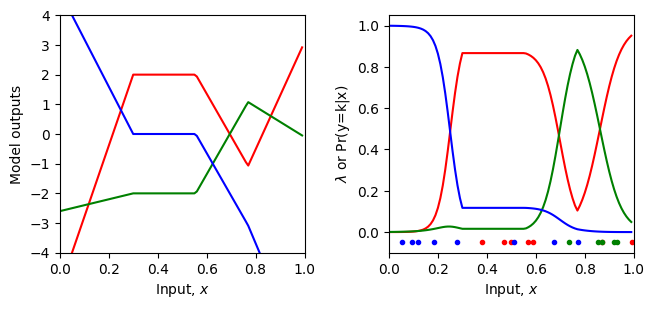

In [36]:
#Do Not Edit
#Use this code for testing
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([2,0,1,2,1,0,\
                    0,2,2,0,2,0,\
                    2,0,1,2,1,2, \
                    1,0])

# Get parameters for the model
beta_0, omega_0, beta_1, omega_1 = get_parameters()

# Define a range of input values
x_model = np.arange(0,1,0.01)
# Run the model to get values to plot and plot it.
model_out= shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = softmax(model_out)
plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train)

### This is the result to previous Task

The left is model output and the right is the model output after the softmax has been applied, so it now lies in the range [0,1] and represents the probability, that y=0 (red), 1 (green) and 2 (blue).  The dots at the bottom show the training data with the same color scheme.  So we want the red curve to be high where there are red dots, the green curve to be high where there are green dots, and the blue curve to be high where there are blue dots  We'll compute the likelihood and the negative log likelihood.

In [37]:
# Return probability under categorical distribution for observed class y
# Just take value from row k of lambda param where y =k,
def categorical_distribution(y, lambda_param):
    return np.array([lambda_param[row, i] for i, row in enumerate (y)])

In [38]:
# Let's double check we get the right answer before proceeding
test1=categorical_distribution(np.array([[0]]),np.array([[0.2],[0.5],[0.3]]))
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.2,test1))
test2=categorical_distribution(np.array([[1]]),np.array([[0.2],[0.5],[0.3]]))
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.5,test2))
test3=categorical_distribution(np.array([[2]]),np.array([[0.2],[0.5],[0.3]]))
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.3,test3))

assert np.round(test1,3)==0.2
assert np.round(test2,3)==0.5
assert np.round(test3,3)==0.3

Correct answer = 0.200, Your answer = 0.200
Correct answer = 0.500, Your answer = 0.500
Correct answer = 0.300, Your answer = 0.300


/tmp/ipykernel_197338/2753111345.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Correct answer = %3.3f, Your answer = %3.3f"%(0.2,test1))
/tmp/ipykernel_197338/2753111345.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Correct answer = %3.3f, Your answer = %3.3f"%(0.5,test2))
/tmp/ipykernel_197338/2753111345.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Correct answer = %3.3f, Your answer = %3.3f"%(0.3,test3))


# Task [10 Points]

Code likelihood and negative log likelihood the same way you did earlier. Only change is the distribution.

In [39]:
def compute_likelihood(y_train, lambda_param):
  likelihood = np.prod(categorical_distribution(y_train, lambda_param))
  return likelihood

def compute_negative_log_likelihood(y_train, lambda_param):
  probs = categorical_distribution(y_train, lambda_param)
  log_probs = np.log(probs)
  nll = -np.sum(log_probs)
  return nll

In [40]:
#Do not Edit
#Use this code for testing
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the parameters of the categorical distribution
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Pass the outputs through the softmax function
lambda_train = softmax(model_out)
# Compute the negative log likelihood
nll = compute_negative_log_likelihood(y_train, lambda_train)
# Let's double check we get the right answer before proceeding
print('likelihood')
print("Correct answer = %9.9f, Your answer = %9.9f"%(17.015457867,nll))


beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the parameters of the categorical distribution
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
lambda_train = softmax(model_out)
# Compute the likelihood
likelihood = compute_likelihood(y_train, lambda_train)
# Let's double check we get the right answer before proceeding
print('negative likelihood')
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000000041,likelihood))

assert round(nll,9)==17.015457867
assert round(likelihood,9)==0.000000041

likelihood
Correct answer = 17.015457867, Your answer = 17.015457867
negative likelihood
Correct answer = 0.000000041, Your answer = 0.000000041


Now let's investigate finding the maximum likelihood / minimum negative log likelihood solution.  For simplicity, we'll assume that all the parameters are fixed except one and look at how the likelihood and negative log likelihood change as we manipulate the last parameter.  We'll start with overall y_offset, $\beta_1$ (formerly $\phi_0$)

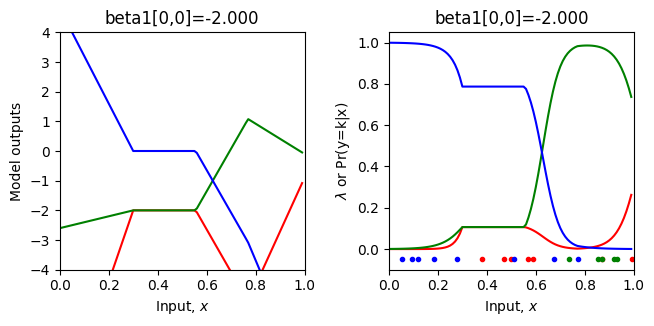

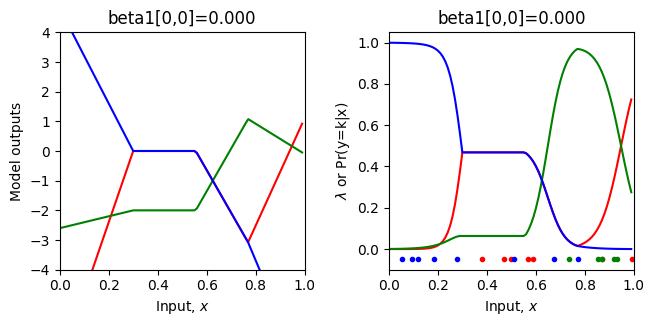

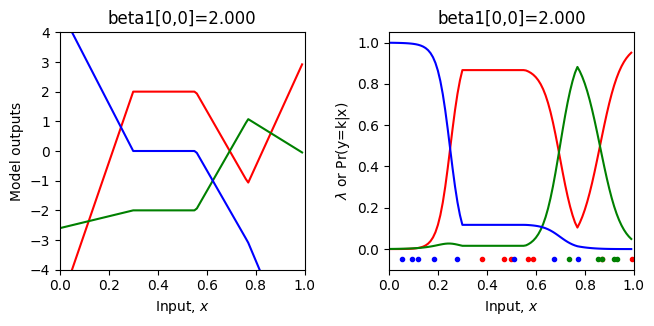

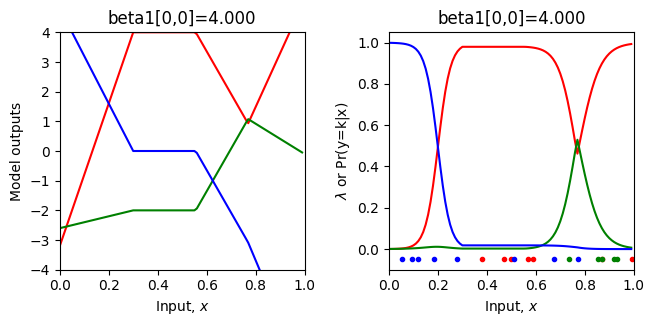

In [41]:
# Define a range of values for the parameter
beta_1_vals = np.arange(-2,6.0,0.1)
# Create some arrays to store the likelihoods, negative log likelihoods
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1[0,0] = beta_1_vals[count]
  # Run the network with new parameters
  model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  lambda_train = softmax(model_out)
  # Compute and store the two values
  likelihoods[count] = compute_likelihood(y_train,lambda_train)
  nlls[count] = compute_negative_log_likelihood(y_train, lambda_train)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    lambda_model = softmax(model_out)
    plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta1[0,0]=%3.3f"%(beta_1[0,0]))


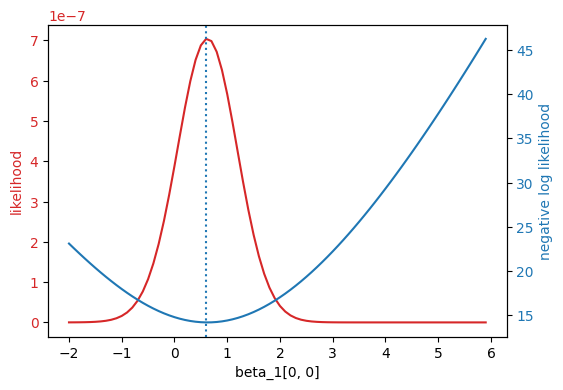

In [42]:
# Now let's plot the likelihood and negative log likelihood as a function of the value of the offset beta1
fig, ax = plt.subplots()
fig.tight_layout(pad=5.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax.set_xlabel('beta_1[0, 0]')
ax.set_ylabel('likelihood', color = likelihood_color)
ax.plot(beta_1_vals, likelihoods, color = likelihood_color)
ax.tick_params(axis='y', labelcolor=likelihood_color)

ax1 = ax.twinx()
ax1.plot(beta_1_vals, nlls, color = nll_color)
ax1.set_ylabel('negative log likelihood', color = nll_color)
ax1.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')

plt.show()


Maximum likelihood = 0.000001, at beta_1=0.600
Minimum negative log likelihood = 14.166574, at beta_1=0.600


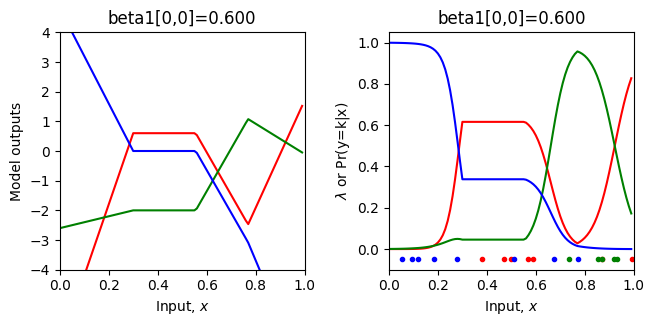

In [43]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood solution
# Let's check that:
print("Maximum likelihood = %f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))

# Plot the best model
beta_1[0,0] = beta_1_vals[np.argmin(nlls)]
model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = softmax(model_out)
plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta1[0,0]=%3.3f"%(beta_1[0,0]))

They both give the same answer. But you can see from the likelihood above that the likelihood is very small unless the parameters are almost correct.  So in practice, we would work with the negative log likelihood.<br><br>

Again, to fit the full neural model we would vary all of the 16 parameters of the network in the $\boldsymbol\beta_{0},\boldsymbol\Omega_{0},\boldsymbol\beta_{1},\boldsymbol\Omega_{1}$ until we find the combination that have the maximum likelihood / minimum negative log likelihood.<br><br>

